In [10]:
# 단 한번만 실행하면 됨
! pip install requests
! pip install beautifulsoup4
! pip install lxml
! pip install pandas
! pip install sklearn
! pip install numpy
! pip install matplotlib
! pip install seaborn

In [22]:
import requests
from bs4 import BeautifulSoup
import lxml
import time
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

In [24]:
org = ["google_renew", "microsoft_renew"]

In [25]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
for o in org:
    df = pd.read_csv("{}.csv".format(o))
    for idx,i in enumerate(df["Topics"]):
        if len(i)==2:
            df.drop(index=idx,inplace=True)
    df.reset_index()
    df.to_csv("{}.csv".format(o))
    result = []
    topic_dic = {}
    for idx,j in enumerate(df['Topics']):
        i_list = j.replace("[","").replace("]","").replace("'","").split(",")
        i_list = [i.strip() for i in i_list]
        df['Topics'][idx] = i_list
        for i in i_list:
            i = i.strip()
            i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
            if len(i)==0:
                continue
            if i not in topic_dic:
                topic_dic[i] = 1
            else:
                topic_dic[i] +=1

    topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
  
    topic_list = [i[0] for i in topic_dic]
    # 위 과정들을 통해 얻은 토픽들을 통해 칼럼을 만듬
    df_vector = pd.DataFrame(topic_list).transpose()

    topic_dic_df = {}
    for i in topic_list:
        topic_dic_df[i]=0
    # 토픽들을 칼럼으로 가지는 각각의 패키지 별로 벡터를 만들고 모든 성분을 0으로 채움
    df_vector = pd.DataFrame(result,index=df['ProjectName'],columns=topic_list).fillna(0)

    # 각 패키지 별로 가지고있는 토픽을 +1 씩 하여 각 패키지의 벡터를 생성함
    for idx,topics in enumerate(df['Topics']):
        for topic in topics:
            if topic in topic_list:
                topic = same_things(topic)
                df_vector.loc[df['ProjectName'].iloc[idx],topic] += 1
    df_vector.to_csv("{}_vectors.csv".format(o),index=False)
    print("{}_vectors.csv".format(o),"저장완료.")


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


google_renew_vectors.csv 저장완료.


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list
/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50688/3385486678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


microsoft_renew_vectors.csv 저장완료.


K-means의 Cluster 수 : 10
********** google_renew K-Means 클러스터링 시작 **********


/Users/kyutaekim/opt/anaconda3/envs/crawling/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


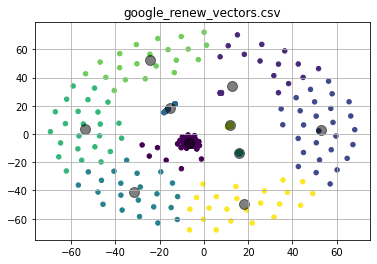

   num                                           clusters  cluster_num  \
0    0  [gvisor, site-kit-wp, orbit, jax, oss-fuzz, un...          157   
1    1  [skywater-pdk-sky130-raw-data, closure-compile...           60   
2    2  [jaxopt, digitalbuildings, chrome-ssh-agent, m...           28   
3    3  [network-opt, marl, open-location-code, iosche...           73   
4    4  [timesketch, gke-policy-automation, nsscache, ...           22   
5    5  [deepconsensus, nerfactor, gif-for-cli, gops, ...           64   
6    6  [styleguide, flatbuffers, XNNPACK, accompanist...           24   
7    7  [syzkaller, nsjail, megalista, go-github, cros...           21   
8    8  [benchmark, android-classyshark, gin-config, p...           69   
9    9  [glance-experimental-tools, go-licenses, gts, ...           23   

                                       top_15_topics  
0  [(android, 21), (security, 11), (google, 9), (...  
1  [(machinelearning, 5), (python, 5), (golang, 4...  
2  [(python, 4), (de

/Users/kyutaekim/opt/anaconda3/envs/crawling/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


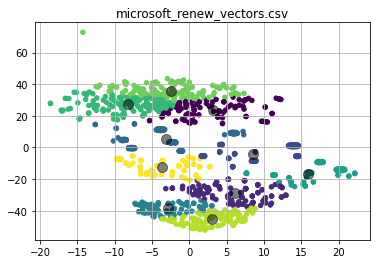

   num                                           clusters  cluster_num  \
0    0  [Microsoft365DSC, Windows-Driver-Developer-Sup...          103   
1    1  [napajs, process-migrator, featuretimeline, Te...          136   
2    2  [PowerBI-visuals-forcasting-tbats, Windows-iot...           85   
3    3  [azure-health-data-services-sdk, botbuilder-py...           96   
4    4  [cardboard-circuits, NeuronBlocks, cookiecutte...           75   
5    5  [O-CNN, vscode-azure-iot-toolkit, vscode-azure...           94   
6    6  [testfx, winget-pkgs, vscode-cpptools, react-n...          151   
7    7  [rnx-kit, vscode, qdk-python, WindowsAppSDK, a...          123   
8    8  [EdgeML, MMdnn, ailab, redux-dynamic-modules, ...          106   
9    9  [satcheljs-cookbook, pxt-ws2812b, inventory-hu...           90   

                                       top_15_topics  
0  [(azure, 19), (machinelearning, 18), (microsof...  
1  [(microsoft, 17), (machinelearning, 15), (azur...  
2  [(azure, 10), (ai

In [26]:
n_clusters = int(input("K-means의 Cluster 수 : "))
for o in org:
    print("{} {} K-Means 클러스터링 시작 {}".format("*"*10,o,"*"*10))
    excel_name = "{}_vectors.csv".format(o)
    df_org = pd.read_csv("{}.csv".format(o))
    df_vector = pd.read_csv(excel_name)
    m = TSNE(learning_rate = 50)
    tsne_features = m.fit_transform(pd.DataFrame(df_vector))
    df = pd.DataFrame()
    df['x'] = tsne_features[:,0]
    df['y'] = tsne_features[:,1]
    
    if len(df) <= n_clusters:
        print("Repository 가 {}개 미만입니다.".format(n_clusters))
        n_clusters = len(df)//3
        print("{}개의 Cluster로 군집화 시작합니다.".format(n_clusters))
    else:
        # 10개의 Cluster 지정
        n_clusters = n_clusters
    kmeans = KMeans(n_clusters=n_clusters)
    # kmeans = KMeans(n_clusters=4,verbose = 1)

    # 모델에 fitting 하기
    kmeans.fit(tsne_features)

    y_kmeans = kmeans.predict(tsne_features)
    y_kmeans[0:10] # 군집화 된 결과
    
    plt.scatter(np.array(tsne_features)[:,0], np.array(tsne_features)[:,1], c=y_kmeans, s=20, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
    plt.grid()
    plt.title(excel_name)
    plt.show()
    
    
    clustered_dic = {}
    clustered_list = []
    cluster_num = len(set(y_kmeans))
    for idx,i in enumerate(y_kmeans):
        if i not in clustered_dic:
            clustered_dic[i] = [df_org['ProjectName'][idx]]
        else:
            clustered_dic[i].append(df_org['ProjectName'][idx])
    clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
    df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
    cluster_num = [len(i) for i in df_cluster['clusters']]
    df_cluster['cluster_num'] = cluster_num
    
    # 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?
    topic_clustered_list = []
    for i in df_cluster['clusters']:
        temp_dic = {}
        for j in i:
            topics = list(df_org[df_org['ProjectName']==j]['Topics'].values[0].replace("[","").replace("]","").replace("'","").split(","))
            for i in topics:
                if len(i)==0:
                    continue
                i = same_things(i.strip())
                if i not in temp_dic:
                    temp_dic[i] = 1
                else:
                    temp_dic[i] += 1
        temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
        topic_clustered_list.append(temp_dic[:15])
    df_cluster['top_15_topics'] = topic_clustered_list
    df_cluster.to_excel("{}_kmeans_10clusters.xlsx".format(o),index=False)
    print(df_cluster)
    print("{}_kmeans_10clusters.xlsx".format(o),"저장완료")
    print("*"*50)